In [14]:
import pandas as pd
import os
import nibabel as nib
from tqdm import tqdm_notebook as tqdm
import numpy as np
import matplotlib.pyplot as plt
tqdm().pandas()

In [2]:
path = '../../../../user/data/decathlon/Task07_Pancreas'

In [3]:
ids = [x for x in os.listdir(os.path.join(path, 'imagesTr')) if x.endswith('.gz') and not x.startswith('._panc')]

In [31]:
print(len(img.shape))

3


In [32]:
for name_ids in ids:
    i = os.path.join(path,'imagesTr',name_ids)
    img = nib.load(i).get_fdata()
    if (len(img.shape)!=3):
        print("FUUUUUCK")

In [33]:
print(1)

1


In [43]:
list_of_density = []
for name_ids in ids:
    i = os.path.join(path,'labelsTr',name_ids)
    img = nib.load(i).get_fdata()
    for ch in range(img.shape[2]):
        list_of_density.append((img[:,:,ch] != 0).sum()/(img[:,:,ch] > -1).sum())

In [54]:
density_no_zeros = 0
for name_ids in ids:
    i = os.path.join(path,'labelsTr',name_ids)
    img = nib.load(i).get_fdata()
    non_zerooo = (len(img[img > 0]))
    number_of_all_elements = (img.shape[0]*img.shape[1]*img.shape[2])
    if (non_zerooo != number_of_all_elements):
        density_no_zeros += 1
print(density_no_zeros)

281


In [56]:
list_of_density_cancer = []
list_of_density_organ = []
for name_ids in ids:
    i = os.path.join(path,'labelsTr',name_ids)
    img = nib.load(i).get_fdata()
    for ch in range(img.shape[2]):
        list_of_density_cancer.append((img[:,:,ch] == 2).sum()/(img[:,:,ch] > -1).sum())
        list_of_density_organ.append((img[:,:,ch] == 1).sum()/(img[:,:,ch] > -1).sum())

In [58]:
print(sum(list_of_density_cancer)/np.count_nonzero(list_of_density_cancer))

0.003000981891347895


In [59]:
print(sum(list_of_density_organ)/np.count_nonzero(list_of_density_organ))

0.005766103393610275


In [113]:
print((len(list_of_density_organ) - np.count_nonzero(list_of_density_organ))/len(list_of_density_organ))

0.6712451813316367


In [51]:
print(len(img[img > 0]))
print(img.shape[0]*img.shape[1]*img.shape[2])


36760
23330816


In [44]:
print(len(list_of_density))

26719


In [47]:
print(sum(list_of_density)/len(list_of_density))

0.0021805809823654426


In [5]:
print(len(ids))

281


In [6]:
path_tr_1 = os.path.join(path,'imagesTr',ids[0])

In [7]:
print(path_tr_1)

../../../../user/data/decathlon/Task07_Pancreas/imagesTr/pancreas_316.nii.gz


In [20]:
path_lb_1 = os.path.join(path,'labelsTr',ids[0])

In [21]:
img = nib.load(path_tr_1).get_fdata()

In [24]:
print(img[:,:,45])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
np.unique(img[:,:,45])

array([0., 1.])

In [28]:
print((img[:,:,45] != 0).sum())

754


In [29]:
print((img[:,:,45] > -1).sum())

262144


In [30]:
print((img[:,:,45] != 0).sum()/(img[:,:,45] > -1).sum())

0.00287628173828125


In [67]:
img = nib.load(path_lb_1).get_fdata()

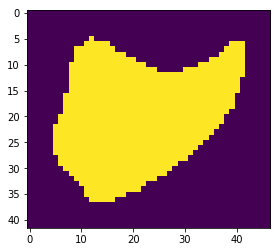

In [97]:
def get_rectangular(img, margin=5):
    x, y = np.where(img)
    x_min = min(x)
    x_max = max(x)
    y_min = min(y)
    y_max = max(y)
    return img[x_min-margin:x_max+1+margin, y_min-margin:y_max+1+margin]
# plt.figure(figsize=(20, 20))
rect = get_rectangular(img[:,:,45])
plt.imshow(rect)


In [99]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
from glob import glob


def get_path(data_path='datasets/'):
    '''return all paths'''
    tasks = [x for x in os.listdir(data_path) if x.startswith('Task')]
    path = []
    for task in tasks:
        # Paths
        path_tr = data_path + task + '/imagesTr'
        path_tr_label = data_path + task + '/labelsTr'
        imglist_tr = glob(path_tr + '/*.gz')
        imglist_tr_label = glob(path_tr_label + '/*.gz')

        for i in range(len(imglist_tr)):
            path.append([imglist_tr[i], imglist_tr_label[i]])
    return path



def get_list(path):
    '''return all samples in list: [[train_sample],sample_mask]]'''
    res_list = []
    if isinstance (path[0], str):
        train_path, label_path = path
        img = nib.load(train_path).get_fdata()
        img_label = nib.load(label_path).get_fdata()
        if (len(img.shape) != 3):
        #    for ch in range(img.shape[2]):
            for i in range(img.shape[3]):
                res_list.append([img[:, :, :, i] , img_label])
        else:
 #           for ch in range(img.shape[2]):
            res_list.append([img, img_label])
    else:
        for train_path, label_path in path:
            img = nib.load(train_path).get_fdata()
            img_label = nib.load(label_path).get_fdata()
            if (len(img.shape) != 3):
#                for ch in range(img.shape[2]):
                for i in range(img.shape[3]):
                    res_list.append([img[:, :, :, i] , img_label])
            else:
           #     for ch in range(img.shape[2]):
                res_list.append([img, img_label])
    return res_list

#    for i, el in enumerate(res_list):            
#        channel = np.random.randint(el[0].shape[2])
#        res_list[i] = [el[0][:, :, channel], el[1][:, :, channel]]
#    res = []
#    for i, el in enumerate(res_list):     
#        for i in range(el[0].shape[2]):
#            res.append([el[0], el[1], i])
#    return res
#    return res_list


In [100]:
path = "../../../../raid/data/decathlon"
folds = "./Task07_Pancreas/folds.csv"

In [107]:
#from load_function import get_path, get_list
import cv2
import os
import torch
import pandas as pd
import numpy as np
from pathlib import Path
from torch.utils.data import Dataset, DataLoader
from src.youtrain.factory import DataFactory
from src.transforms import test_transform, mix_transform
from tqdm import tqdm
from albumentations.torch import ToTensor
import matplotlib
import matplotlib.pyplot as plt
from torch.utils.data import Sampler
import gc
import json

class BaseDataset(Dataset):
    def __init__(self, path, transform):
        self.ids = get_path(path + '/')
        self.transform = transform
#        print(len(self.ids))

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, index):
        raise NotImplementedError


class TrainDataset(BaseDataset):
    def __init__(self, path, folds, transform):
        super().__init__(path, transform)
        self.folds = folds
        self.ids = [el for el in self.ids if el[0].split('/')[-1] in folds.ImageId.values]

    def get_rectangular(self, img):
        if not img.sum():
            return 0, 32, 0, 32
        x, y = np.where(img)
        x_min = min(x)
        x_max = max(x)
        y_min = min(y)
        y_max = max(y)
        return x_min, x_max, y_min, y_max

    def crop(self, img, crop_boundaries, margin=5):
        x_min, x_max, y_min, y_max = crop_boundaries
        return img[min(0, x_min - margin):max(x_max + 1 + margin, img.shape[0]),
                   min(0, y_min - margin):max(y_max + 1 + margin, img.shape[0])]

    def __getitem__(self, index):
        name = self.folds.iloc[index].ImageId
        slice = self.folds.iloc[index].ch_number
        name = [el for el in self.ids if el[0].split('/')[-1] in name][0]

        gl = get_list(name)
        image = gl[0][0]
        mask = gl[0][1]
        image = image[:, :, slice]
        mask = mask[:, :, slice]
        pancreats_mask = (mask > 0).astype(int)
        cancer_mask = (mask == 2).astype(int)
        crop_boundaries = self.get_rectangular(pancreats_mask)
        image = self.crop(image, crop_boundaries)
        mask = self.crop(cancer_mask, crop_boundaries)

        # mask = mask[:,:,slice]
        # ch1 = (mask == 0).astype(int)
        # ch2 = (mask == 1).astype(int)
        # ch3 = (mask == 2).astype(int)
        # mask = np.stack([ch1, ch2, ch3]).transpose(1, 2, 0)
        # print(image.shape, mask.shape)
        return self.transform(image=image.reshape(image.shape[0], image.shape[1], 1),
                              mask=mask)

    def __len__(self):
        return len(self.folds)

class TestDataset(BaseDataset):
    def __init__(self, image_dir, ids, transform):
        super().__init__(image_dir, ids, transform)
        self.transform = transform
        self.ids = ids
        self.image_dir = image_dir

    def __getitem__(self, index):
        name = self.ids[index]
        image = cv2.imread(os.path.join(self.image_dir, name))
        return self.transform(image=image)['image']


class TaskDataFactory(DataFactory):
    def __init__(self, params, paths, **kwargs):
        super().__init__(params, paths, **kwargs)
        self.fold = kwargs['fold']
        self._folds = None

    @property
    def data_path(self):
        return Path(self.paths['path'])

    def make_transform(self, stage, is_train=False):
        if is_train:
            if stage['augmentation'] == 'mix_transform':
                transform = mix_transform(**self.params['augmentation_params'])
            else:
                raise KeyError('augmentation does not found')
        else:
            transform = test_transform(**self.params['augmentation_params'])
        return transform

    def make_dataset(self, stage, is_train):
        transform = self.make_transform(stage, is_train)
        folds = self.train_ids if is_train else self.val_ids
#        print(self.data_path)
        return TrainDataset(
            path=str(self.data_path),
#            mask_dir=self.data_path / self.paths['train_masks'],
            folds=folds,
            transform=transform)

    def make_loader(self, stage, is_train=False):
        dataset = self.make_dataset(stage, is_train)
        return DataLoader(
            dataset=dataset,
            batch_size=self.params['batch_size'],
            shuffle=is_train,
            drop_last=is_train,
            num_workers=self.params['num_workers'],
            pin_memory=torch.cuda.is_available(),
        )
    
    @property
    def folds(self):
        if self._folds is None:
            self._folds = pd.read_csv(self.data_path / self.paths['folds'])
        return self._folds

    @property
    def train_ids(self):
        return self.folds.loc[self.folds['fold'] != self.fold]

    @property
    def val_ids(self):
        return self.folds.loc[self.folds['fold'] == self.fold]


In [109]:
ab = TaskDataFactory(path,folds, fold = 0)

In [110]:
bc = ab.make_dataset

TypeError: 'TaskDataFactory' object does not support indexing

In [83]:
get_rectangular(img[:,:,45])

(246, 277, 272, 308)

In [81]:
img[250:, ]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [19]:
np.unique(img[:,:,45])

array([-1024., -1023., -1022., ...,  1127.,  1138.,  1195.])

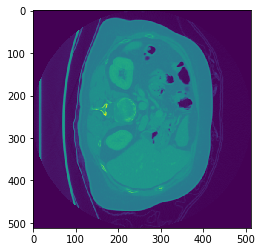

In [15]:
plt.imshow(img[:,:,45])

In [4]:

# Paths
path_tr = path+'/imagesTr'
path_tr_label = path+'/labelsTr'
imglist_tr = glob(path_tr+'/*.gz')
imglist_tr_label = glob(path_tr_label+'/*.gz')
imglist_ts = glob(path_ts+'/*.gz')
print('num_train = {}, num_test = {}'.format(len(imglist_tr), len(imglist_ts)))
print('Image dimensions:')
print('Train:')

# Dimensions
for img_name in imglist_tr[:5]:
    img = nib.load(img_name)
    print(img.shape)
print('Test:')
for img_name in imglist_ts[:5]:
    img = nib.load(img_name)
    print(img.shape)
# Find number of sub labels

# Images
for i in range(3):
    img = nib.load(imglist_tr[0]).get_fdata()
    label = nib.load(imglist_tr_label[0]).get_fdata()
    print('Image Min-Max values: Image={},{} and label={},{}'.format(img.max(), img.min(), label.max(), label.min()))
    print('Number of subclasses = ', int(label.max())+1)
    print('third dimension i = {}' .format(i))
    if task=='Task05_Prostate':
        ax = plt.subplot('131')
        ax.imshow(img[:,:,i*5+5,0], cmap='gray')
        ax.set_title('Image channel 1')
        ax = plt.subplot('132')
        ax.imshow(img[:,:,i*5+5,1], cmap='gray')
        ax.set_title('Image channel 2')
        ax = plt.subplot('133')
        ax.imshow(label[:,:,i*5+5], cmap='gray')
        ax.set_title('Segmentation Mask')
        plt.show()

['pancreas_316.nii.gz', 'pancreas_355.nii.gz', 'pancreas_246.nii.gz', 'pancreas_409.nii.gz', 'pancreas_040.nii.gz', 'pancreas_380.nii.gz', 'pancreas_399.nii.gz', 'pancreas_278.nii.gz', 'pancreas_289.nii.gz', 'pancreas_225.nii.gz', 'pancreas_066.nii.gz', 'pancreas_181.nii.gz', 'pancreas_267.nii.gz', 'pancreas_310.nii.gz', 'pancreas_344.nii.gz', 'pancreas_419.nii.gz', 'pancreas_129.nii.gz', 'pancreas_166.nii.gz', 'pancreas_401.nii.gz', 'pancreas_001.nii.gz', 'pancreas_087.nii.gz', 'pancreas_413.nii.gz', 'pancreas_421.nii.gz', 'pancreas_416.nii.gz', 'pancreas_318.nii.gz', 'pancreas_309.nii.gz', 'pancreas_159.nii.gz', 'pancreas_084.nii.gz', 'pancreas_106.nii.gz', 'pancreas_256.nii.gz', 'pancreas_298.nii.gz', 'pancreas_209.nii.gz', 'pancreas_204.nii.gz', 'pancreas_015.nii.gz', 'pancreas_389.nii.gz', 'pancreas_312.nii.gz', 'pancreas_010.nii.gz', 'pancreas_052.nii.gz', 'pancreas_342.nii.gz', 'pancreas_180.nii.gz', 'pancreas_200.nii.gz', 'pancreas_170.nii.gz', 'pancreas_339.nii.gz', 'pancreas_

In [10]:
folds = ['pancreas_100.nii.gz']

In [11]:
ds = TrainDataset('../', folds, pre_transform(256))

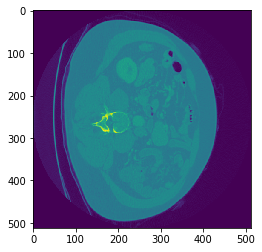

In [20]:
plt.imshow(ds[0]['image'].squeeze())

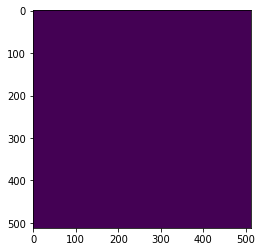

In [21]:
plt.imshow(ds[0]['mask'].squeeze())

In [ ]:
....